In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint

from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from statsmodels import OLS

In [6]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)
df_y.columns = ['HOUSING PRICE']
pd.concat([df_x, df_y], axis=1).to_csv('Boston.csv', sep = ',', index = False)

In [7]:
model = linear_model.LinearRegression()

In [8]:
boston = load_boston()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [10]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
results = model.predict(x_test)

In [13]:
from statsmodels.api import OLS
model2 = OLS(df_y, df_x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          HOUSING PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sun, 24 May 2020   Prob (F-statistic):                        0.00
Time:                        14:42:23   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(np.c_[y_test.values, results])

[[16.5        12.07495986]
 [24.8        26.9894969 ]
 [17.4        17.58803353]
 [19.3        18.15584511]
 [37.6        36.92091659]
 [24.2        25.43267386]
 [35.4        31.09256932]
 [19.9        19.72549907]
 [27.5        19.66103377]
 [17.         22.96358632]
 [31.2        28.38841214]
 [24.4        28.48925986]
 [16.1        18.99690357]
 [27.         32.41097504]
 [21.         21.52350275]
 [14.9        15.25945122]
 [18.9        21.23364112]
 [ 6.3        11.6220597 ]
 [16.3        11.37109662]
 [13.9        13.63515584]
 [ 8.8         5.62431971]
 [19.4        17.35323315]
 [18.8        20.80951594]
 [19.8        22.51311312]
 [17.5        16.39055556]
 [19.3        20.32352451]
 [20.         17.88994185]
 [14.3        14.23445109]
 [16.1        21.1187098 ]
 [19.5        17.50765806]
 [11.         14.54295525]
 [21.9        23.63289896]
 [31.         34.32419647]
 [22.         22.23027161]
 [15.1        16.82396516]
 [13.3        20.16274383]
 [28.7        30.67665825]
 

In [14]:
pred_val = model2.fittedvalues.copy()
residual = pred_val - df_y.values.flatten()

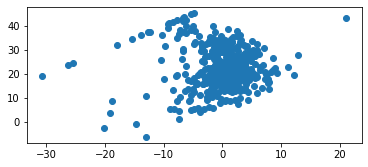

In [15]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(residual, pred_val)

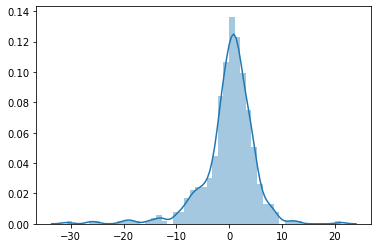

In [16]:
sns.distplot(residual);

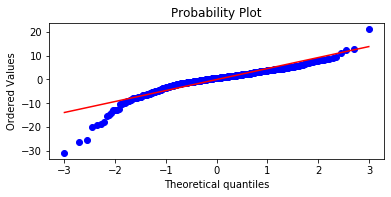

In [17]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [18]:
#X = df_x['CRIM'].values.reshape(-1, 1)
X = df_x.iloc[:,0].values.reshape(-1, 1)
#X = df_x['RM'].values.reshape(-1, 1)
#X = df_x.iloc[:,5].values.reshape(-1, 1)
Y = df_y.values.reshape(-1,1)

In [19]:
model3 = linear_model.LinearRegression()
model3.fit(X,Y)
Y_pred = model3.predict(X)

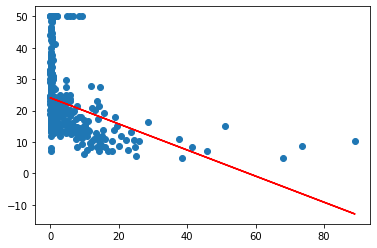

In [20]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()